<a href="https://www.kaggle.com/code/souvikg544/svm-kernel?scriptVersionId=101426949" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(8**2-x1**2)
x1=np.hstack([x1,-x1])
y1=np.hstack([y1,-y1])

In [4]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(6**2 - (x**2))
x=np.hstack([x,-x])
y=np.hstack([y,-y])

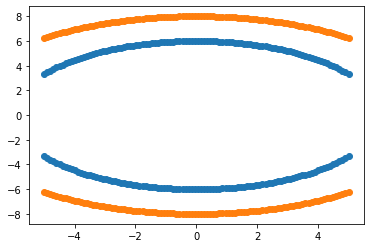

In [5]:
plt.scatter(x,y)
plt.scatter(x1,y1)

In [6]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

,X1,X2,Y
0,3.316625,-5.00000,0
1,3.464087,-4.89899,0
2,3.602692,-4.79798,0
3,3.733427,-4.69697,0
4,3.857092,-4.59596,0


In [7]:
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [8]:
X = df.iloc[:, :2]  
y = df.Y

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [11]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [12]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,3.316625,-5.00000,0,11.000000,25.000000,-16.583124
1,3.464087,-4.89899,0,11.999898,24.000102,-16.970527
2,3.602692,-4.79798,0,12.979390,23.020610,-17.285644
3,3.733427,-4.69697,0,13.938476,22.061524,-17.535793
4,3.857092,-4.59596,0,14.877155,21.122845,-17.727037


In [13]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

In [15]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [16]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()